In [145]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

## Задание 1: Получить данные из файлов "Сроки разрезы.csv" и "Территории.csv"

In [10]:
df_time = pd.read_csv('Сроки разрезы.csv')
df_time

,ДатаВыхода,Филиал,Товар,Выход,ОперацияДокумента,ДнейВРемонте,СрокНаФП,СрокВТранзите,СрокВАСЦ,СрокРСЦ,СрокДрФилиал,Дата
0,2020-06-17 10:32:46.000,180,1345630,АД,Гарантийный ремонт,59.831817,20.169849,4.857419,NaN,NaN,34.804549,2020-06-17
1,2020-07-01 12:32:38.000,180,1615669,Выдача,Гарантийный ремонт,37.839838,32.978206,2.968032,NaN,NaN,1.893600,2020-07-01
2,2020-06-29 12:26:46.000,180,1381635,АД,Гарантийный ремонт,24.875000,1.791238,2.096875,14.00809,6.023600,0.955197,2020-06-29
3,2020-06-17 14:42:58.000,180,8109626,АД,Проверка качества,6.047882,1.866215,3.325463,NaN,0.015509,0.840694,2020-06-17
4,2020-06-27 10:10:17.000,180,1131595,Выдача,Проверка качества,10.812269,1.970567,4.988831,NaN,NaN,3.852870,2020-06-27
...,...,...,...,...,...,...,...,...,...,...,...,...
237932,2020-06-24 16:33:38.000,345,1342260,Выдача,Платный ремонт,2.093819,NaN,NaN,NaN,NaN,NaN,2020-06-24
237933,2020-07-16 12:19:24.000,345,1332093,Выдача,Платный ремонт,16.767743,NaN,NaN,NaN,NaN,NaN,2020-07-16
237934,2020-07-10 10:30:16.000,410,1394634,Выдача,Платный ремонт,2.746238,NaN,NaN,NaN,NaN,NaN,2020-07-10
237935,2020-07-21 13:17:51.000,410,6629452,Выдача,Платный ремонт,0.068727,NaN,NaN,NaN,NaN,NaN,2020-07-21


In [33]:
df_areas = pd.read_csv('Территории.csv')
df_areas

,КодФирмы,Территория
0,3121,04. див. Урал
1,2106,06. див. Средняя Волга
2,311,09. див. Черноземье
3,618,09. див. Черноземье
4,590,01. див. Дальний Восток
...,...,...
4597,106,02. див. Восточная Сибирь
4598,1339,03. див. Западная Сибирь
4599,1550,09. див. Черноземье
4600,229,07. див. Верхняя Волга


## Задание 2: Соединить полученные таблицы по коду филиала внутренним соединением

In [94]:
df = df_areas.merge(right=df_time, left_on='КодФирмы', right_on='Филиал', how='inner').drop(columns='Филиал')
df

,КодФирмы,Территория,ДатаВыхода,Товар,Выход,ОперацияДокумента,ДнейВРемонте,СрокНаФП,СрокВТранзите,СрокВАСЦ,СрокРСЦ,СрокДрФилиал,Дата
0,325,08. див. Центральный,2020-07-03 12:35:07.000,1001612,Выдача,Платный ремонт,22.910104,0.002998,0.029097,NaN,NaN,NaN,2020-07-03
1,325,08. див. Центральный,2020-07-03 09:50:54.000,1121435,Выдача,Платный ремонт,16.685775,0.708588,6.960683,NaN,0.878414,8.138090,2020-07-03
2,325,08. див. Центральный,2020-07-20 18:23:09.000,1039288,Выдача,Платный ремонт,2.171667,0.005637,2.163171,NaN,NaN,0.000266,2020-07-20
3,4204,02. див. Восточная Сибирь,2020-06-26 12:55:32.000,1026077,Выдача,Гарантийный ремонт,32.124363,0.268958,0.694433,NaN,3.033137,NaN,2020-06-26
4,46,03. див. Западная Сибирь,2020-07-14 17:50:41.000,1115805,Закрытие заказа,Гарантийный ремонт,168.018056,168.018056,NaN,NaN,NaN,NaN,2020-07-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237921,68,03. див. Западная Сибирь,2020-07-17 11:40:59.000,1352389,Выдача,Гарантийный ремонт,28.005174,0.752072,2.058021,NaN,NaN,25.193831,2020-07-17
237922,68,03. див. Западная Сибирь,2020-07-15 17:07:03.000,1064936,АД,Гарантийный ремонт,23.162280,NaN,NaN,22.279572,NaN,NaN,2020-07-15
237923,68,03. див. Западная Сибирь,2020-07-06 12:00:54.000,8121650,Выдача,Гарантийный ремонт,13.947535,2.745000,NaN,10.358287,NaN,NaN,2020-07-06
237924,68,03. див. Западная Сибирь,2020-06-28 19:04:17.000,1133541,АД,Гарантийный ремонт,6.236597,NaN,NaN,3.392153,NaN,NaN,2020-06-28


## Задание 3: Составить сводную таблицу по соединенному датафрейму со средним количеством дней в ремонте по территориям и датам 

In [95]:
df_pivot = df.pivot_table(values='ДнейВРемонте', index=['Территория', 'Дата'], aggfunc='mean', observed=True,
                           margins=True, margins_name='Итог: ')
df_pivot

ДнейВРемонте
Территория               Дата                    
01. див. Дальний Восток  2020-06-08      9.900150
                         2020-06-09      7.276574
                         2020-06-11      1.965984
                         2020-06-12      9.197998
                         2020-06-13     13.899387
...                                           ...
11. див. Северо-Западный 2020-07-25      6.920291
                         2020-07-26      5.744414
                         2020-07-27      8.991857
                         2020-07-28     11.649338
Итог:                                   10.285523

[497 rows x 1 columns]

## Задание 4: Отрисовать линейный график для одного (нескольких по желанию) дивизиона на выбор, х - дата, у - среднее количество дней в ремонте

In [183]:
# получение списка регионов.
df_ = df_pivot.reset_index().drop(index=496)

region = df_['Территория'].value_counts().index.tolist()
region

['01. див. Дальний Восток',
 '05. див. Юг',
 '02. див. Восточная Сибирь',
 '03. див. Западная Сибирь',
 '07. див. Верхняя Волга',
 '11. див. Северо-Западный',
 '10. див. Приволжский',
 '06. див. Средняя Волга',
 '04. див. Урал',
 '09. див. Черноземье',
 '08. див. Центральный']

### Для одного дивизиона.

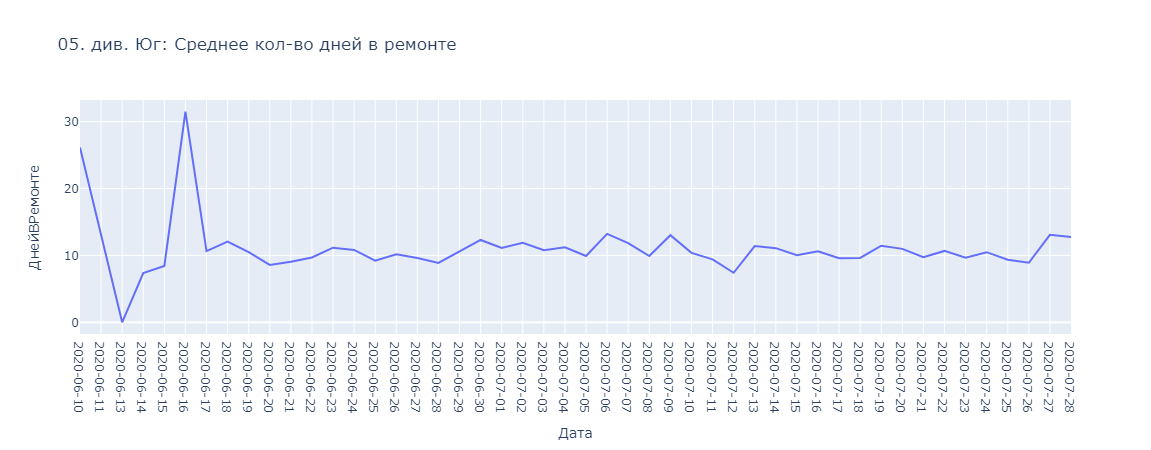

In [186]:
 # Получение данных из сводной таблицы по одному региону.
val = region[1]

df_region = df_pivot[(df_pivot.index.get_level_values(0) == val)].reset_index().drop(columns=('Территория')) # Получение данных из сводной таблицы

fig = px.line(df_region, x="Дата", y="ДнейВРемонте", title=f'{val}: Среднее кол-во дней в ремонте')

fig.update_xaxes(type='category')
fig.show()

###  Для нескольких дивизионов 

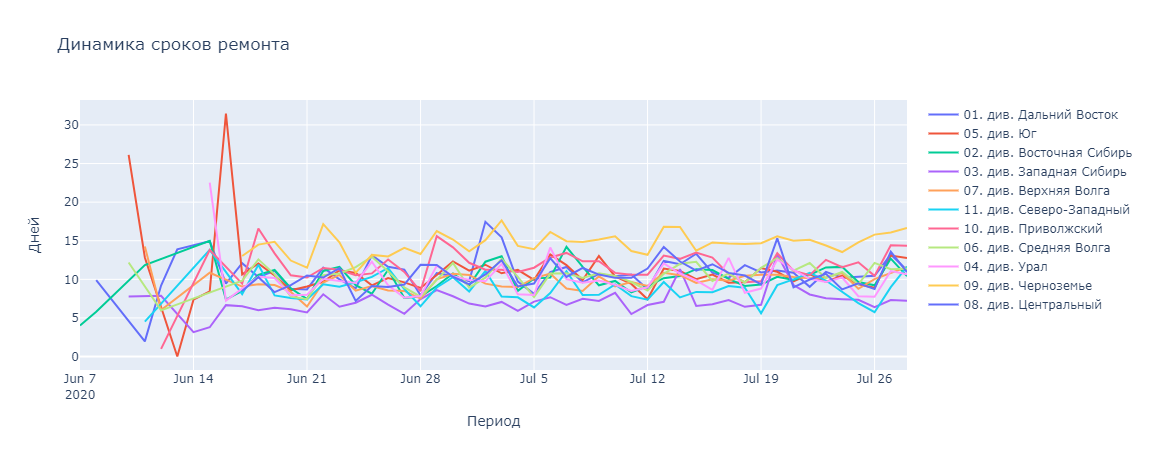

In [170]:
fig = go.Figure()

for i in region:
    pd_pvt = df_pivot[(df_pivot.index.get_level_values(0) == i)].reset_index().drop(columns=('Территория'))
    
    fig.add_trace(go.Scatter(x=pd_pvt['Дата'], 
                             y=pd_pvt['ДнейВРемонте'], 
                             mode='lines', 
                             name=f'{i}', 
                            )
                 )

fig.update_layout(title='Динамика сроков ремонта',
                   xaxis_title='Период',
                   yaxis_title='Дней')
    
fig.update_xaxes
fig.show()